## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno
%matplotlib inline

## Importing Datasets

In [2]:
df = pd.read_csv('./netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 1. Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

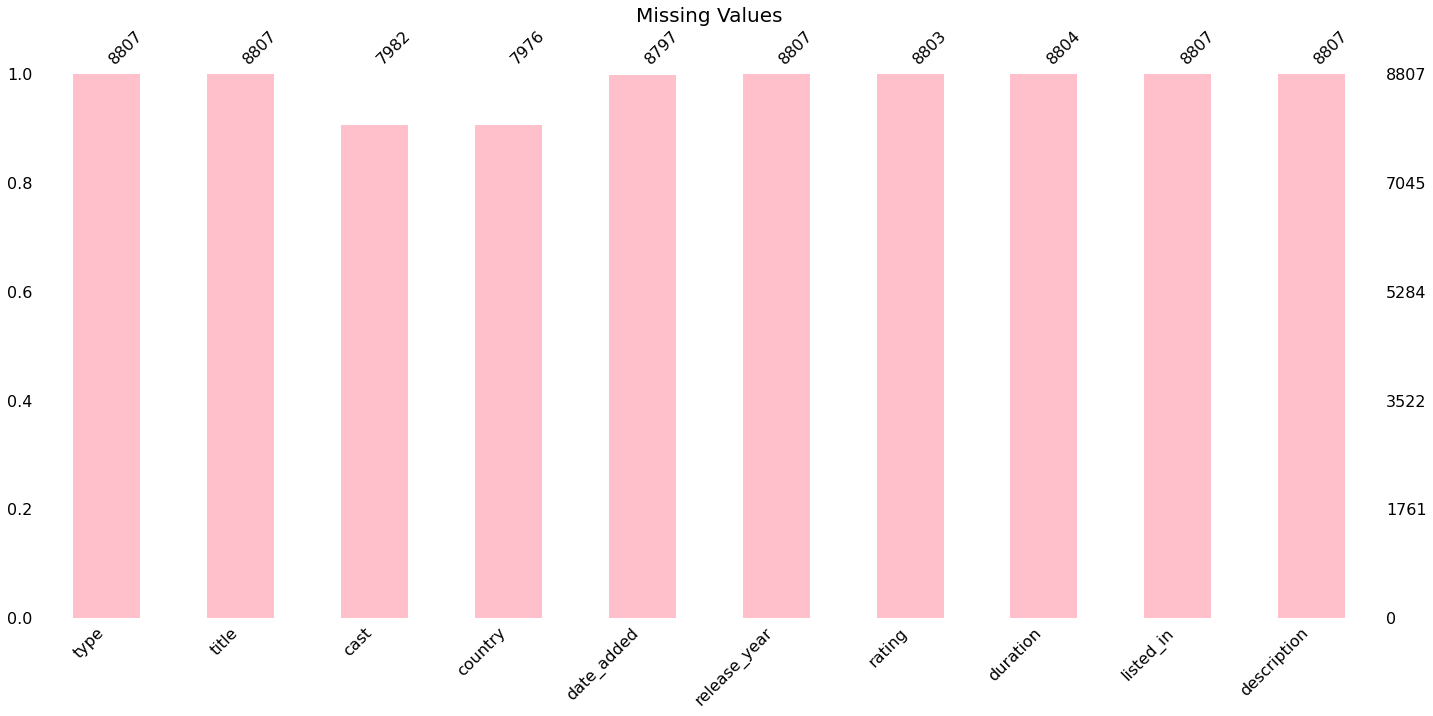

In [36]:
missingno.bar(df,color='pink')
plt.title('Missing Values',fontsize=20)

The dataset happens to have its on unique values. I'm going to index on that

In [7]:
df.set_index(df.show_id,drop=True,inplace=True)

In [8]:
df.drop(columns=['show_id'],axis=1,inplace=True)

In [9]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Inspecting the columns for discrepancies

In [10]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [11]:
len(df.title.unique())

8807

In [12]:
df[df.director.isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...
s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...


In [13]:
(df.director.isna().sum() / len(df))*100

29.908027705234474

The director column has a lot of null values (30% are null values). Since I'm not making use of the column, i can drop it

In [14]:
df.drop(columns=['director'],axis=1,inplace=True)

In [15]:
df[df.cast.isna()]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
s15,TV Show,Crime Stories: India Detectives,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...
s8747,Movie,Winnie,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
s8756,TV Show,Women Behind Bars,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
s8757,Movie,Woodstock,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...


825 of the data have Null Casts. It will be practically impossible to fill in the missing values. So i would just drop it

In [38]:
df.drop(columns='cast',axis=1,inplace=True)

The country column has some missing values. Insteading of the droping the column, I will fill the NaN spaces with the Mode of 
the country column

In [42]:
df.country.fillna(df.country.mode()[0],inplace=True)

In [44]:
df.isna().sum()

type             0
title            0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

Since the missing rows are not much, I can afford to drop rows with null values

In [56]:
df.dropna(subset=['date_added'],inplace=True)

In [58]:
df.dropna(subset=['rating'],inplace=True)

In [60]:
df.dropna(subset=['duration'],inplace=True)

In [61]:
df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Conclusion: All the columns in the dataframe have been dropped or filled

In [16]:
country_list = df.country.unique()

In [17]:
country_list

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

I want a list of all the countries and their occurence

In [18]:
country = set()

In [19]:
for i in country_list:
    try:
        temp_list = i.split(',')
        for j in temp_list:
            country.add(j)
    except AttributeError:
        continue
        
    

In [20]:
country.discard('')

In [21]:
new_country_list = []

In [22]:
for i in country:
    new_country_list.append(i.strip())

There are 196 countries involved with netflix in the past years

In [23]:
len(new_country_list)

196

In [24]:
country_count_map = {}

In [25]:
for country in new_country_list:
    count = 0
    for i in country_list:
        try:
            temp_list = i.split(',')
            for j in temp_list:
                if j.strip() == country:
                    count += 1
        except AttributeError:
            continue
    country_count_map[country] = count

In [26]:
country_count_map

{'Hong Kong': 18,
 'Iran': 4,
 'Bangladesh': 2,
 'Burkina Faso': 1,
 'Saudi Arabia': 6,
 'Mongolia': 1,
 'Nigeria': 7,
 'Croatia': 4,
 'Bulgaria': 5,
 'Syria': 3,
 'India': 48,
 'Nicaragua': 1,
 'Guatemala': 2,
 'Japan': 38,
 'Serbia': 6,
 'Albania': 1,
 'Cyprus': 1,
 'Sri Lanka': 1,
 'United Kingdom': 207,
 'Luxembourg': 12,
 'Sweden': 26,
 'Afghanistan': 1,
 'Peru': 7,
 'Chile': 13,
 'Latvia': 1,
 'South Africa': 27,
 'Egypt': 9,
 'Germany': 116,
 'Romania': 9,
 'Soviet Union': 2,
 'Taiwan': 8,
 'Sudan': 1,
 'Slovenia': 3,
 'Belgium': 51,
 'Lithuania': 1,
 'France': 177,
 'Uruguay': 12,
 'Ukraine': 2,
 'Kenya': 4,
 'South Korea': 26,
 'China': 53,
 'Samoa': 1,
 'Armenia': 1,
 'Namibia': 2,
 'Somalia': 1,
 'Paraguay': 1,
 'New Zealand': 17,
 'Iceland': 6,
 'Mozambique': 1,
 'Colombia': 15,
 'Senegal': 3,
 'Angola': 1,
 'Israel': 14,
 'Venezuela': 4,
 'Lebanon': 16,
 'Australia': 43,
 'Jordan': 8,
 'Cuba': 1,
 'Nepal': 2,
 'Finland': 11,
 'Panama': 1,
 'Argentina': 25,
 'Canada': 117,


In [27]:
country_count_df = pd.DataFrame({'count':country_count_map}).sort_values(ascending=False,by='count')
country_count_df.head()

,count
United States,359
United Kingdom,207
France,177
Canada,117
Germany,116


From our results, the countries with the most movies acted are United States and United Kingdom

We also have a date_added column which we can convert to a datetime for ease of work

In [28]:
pd.to_datetime(df.date_added)

show_id
s1      2021-09-25
s2      2021-09-24
s3      2021-09-24
s4      2021-09-24
s5      2021-09-24
           ...    
s8803   2019-11-20
s8804   2019-07-01
s8805   2019-11-01
s8806   2020-01-11
s8807   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [29]:
df.date_added = pd.to_datetime(df.date_added)

In [30]:
df.date_added.min()

Timestamp('2008-01-01 00:00:00')

In [31]:
df[df.date_added.dt.year==2008]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,
s5958,Movie,To and From New York,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."
s6612,TV Show,Dinner for Five,NaN,United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo..."


In [32]:
df.release_year.unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

## Questions

- Who is the most popular actor?
- Which is made more, TV shows or Series?